In [1]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller,acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_pacf
import statsmodels.api as sm
from pylab import rcParams

In [2]:
df = pd.read_csv('/content/sales.csv')
print("Shape of the data:",df.shape)
df.info()

Shape of the data: (365, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  365 non-null    int64  
 1   Date        365 non-null    object 
 2   Sales       365 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 8.7+ KB


In [3]:
df.head()

,Unnamed: 0,Date,Sales
0,0,2021-10-01,29.109547
1,1,2021-10-02,30.720435
2,2,2021-10-03,30.305173
3,3,2021-10-04,27.390893
4,4,2021-10-05,22.841123


In [4]:
columns = 0
df = df.drop(df.columns[columns], axis =1 )
df

,Date,Sales
0,2021-10-01,29.109547
1,2021-10-02,30.720435
2,2021-10-03,30.305173
3,2021-10-04,27.390893
4,2021-10-05,22.841123
...,...,...
360,2022-09-26,43.698457
361,2022-09-27,38.827336
362,2022-09-28,38.761570
363,2022-09-29,41.144471


## Understanding The Data
- Dataframe 'df' contains the time series data. There are two columns 'Date' and 'Sales'.
- The Sales column contains the sales value on a given date.


In [5]:
df['Date'] = pd.to_datetime(df.Date)
df = df.set_index(df.Date)
df.drop('Date', axis = 1, inplace = True)
print('Column datatypes= \n',df.dtypes)
df

Column datatypes= 
 Sales    float64
dtype: object


,Sales
Date,
2021-10-01,29.109547
2021-10-02,30.720435
2021-10-03,30.305173
2021-10-04,27.390893
2021-10-05,22.841123
...,...
2022-09-26,43.698457
2022-09-27,38.827336
2022-09-28,38.761570


## Time Series Characteristics <a id ="32"></a>

### Trend

Text(0.5, 1.0, 'Trend of the Time Series')

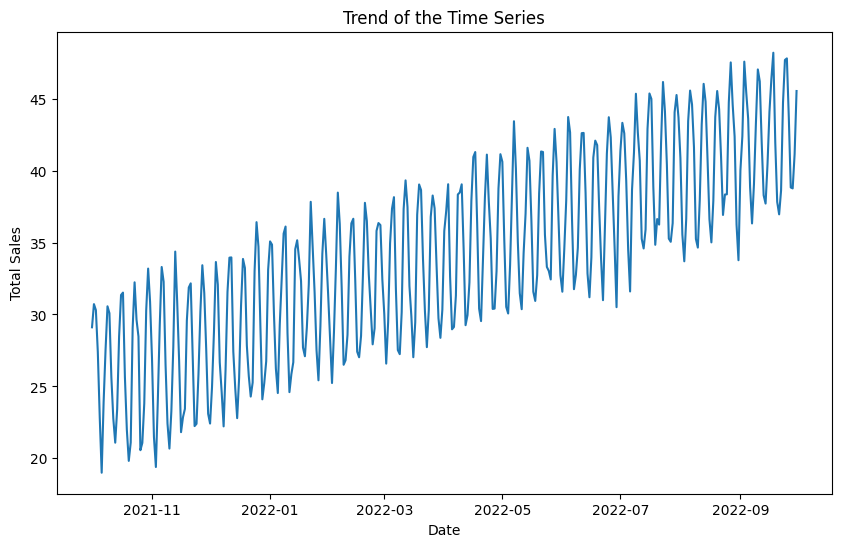

In [6]:
plt.figure(figsize= (10,6))
plt.plot(df)
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Trend of the Time Series')

As you can see from the above plot there is an upward trend in sales for every month. We can also see the graph going up and down at regular interval, that is the sign of seasonality.

### Decomposition of Time Series

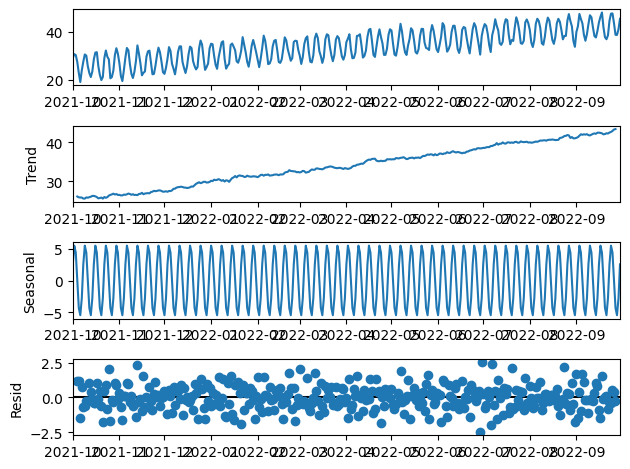

In [7]:
decomposition = sm.tsa.seasonal_decompose(df, model='additive')
fig = decomposition.plot()

Based on the results obtained, it is known that the plot is a type of seasonality. then you can use the SARIMAX model

## Determine the values of p, d, and q

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

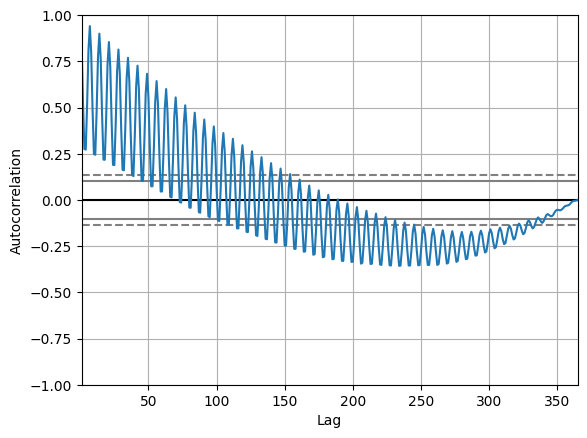

In [8]:
pd.plotting.autocorrelation_plot(df["Sales"])

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


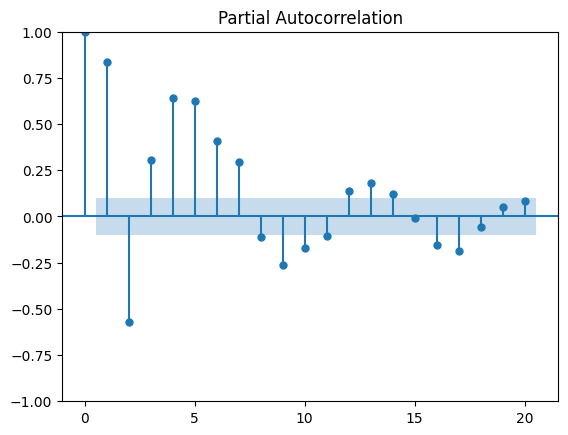

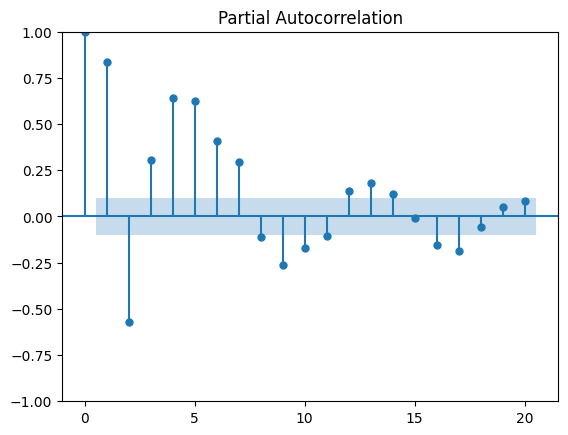

In [9]:
plot_pacf(df["Sales"], lags=20)

## Create models

In [16]:
order = (5, 1, 2)
seasonal_order = (5, 1, 2,12)  # Nilai musiman (jika ada)
model = sm.tsa.SARIMAX(df, order=order, seasonal_order=seasonal_order)
results = model.fit()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [17]:
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Sales   No. Observations:                  365
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood                -570.591
Date:                            Tue, 08 Aug 2023   AIC                           1171.182
Time:                                    15:11:02   BIC                           1229.136
Sample:                                10-01-2021   HQIC                          1194.245
                                     - 09-30-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0701      0.103      0.681      0.496      -0.132       0.272
ar.L2         -0.3813      0.052   

## forecast for the next month

In [19]:
forecast_steps = 31
forecast = results.get_prediction(start=len(df), end=len(df) + forecast_steps - 1)
forecast_mean = forecast.predicted_mean
confidence_interval = forecast.conf_int()

# Print prediction results
print(forecast_mean)

2022-10-01    48.511453
2022-10-02    48.066180
2022-10-03    43.825187
2022-10-04    39.505725
2022-10-05    38.036466
2022-10-06    40.682792
2022-10-07    45.224397
2022-10-08    47.958967
2022-10-09    48.223742
2022-10-10    45.107000
2022-10-11    41.391550
2022-10-12    39.383566
2022-10-13    41.586495
2022-10-14    45.446618
2022-10-15    47.604751
2022-10-16    48.318976
2022-10-17    44.394089
2022-10-18    39.807298
2022-10-19    40.051336
2022-10-20    40.967880
2022-10-21    46.459051
2022-10-22    48.843123
2022-10-23    49.599146
2022-10-24    45.863985
2022-10-25    41.214476
2022-10-26    39.713089
2022-10-27    41.432585
2022-10-28    46.131279
2022-10-29    49.204403
2022-10-30    48.433131
2022-10-31    46.143341
Freq: D, Name: predicted_mean, dtype: float64


## Visualization of prediction results

<Axes: xlabel='Date'>

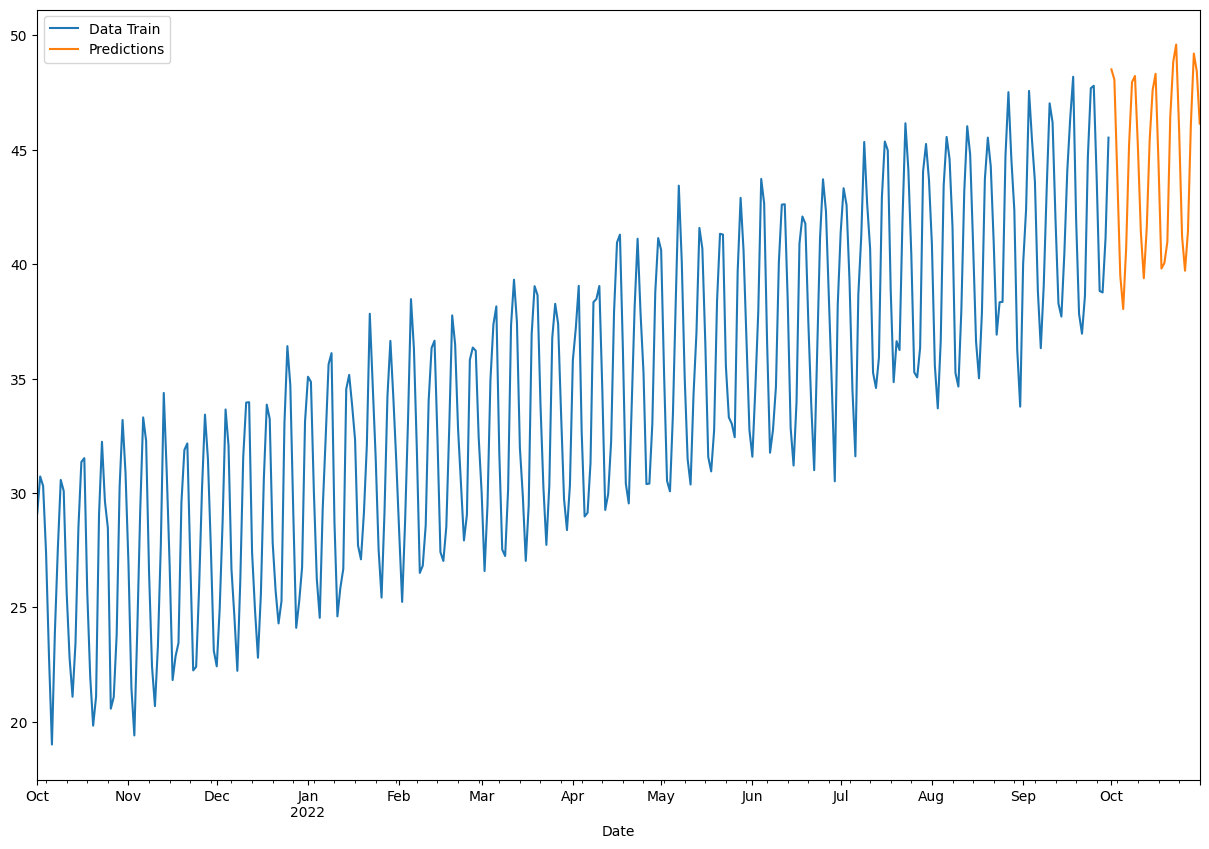

In [13]:
df["Sales"].plot(legend=True,
                 label="Data Train",
                 figsize=(15,10))
forecast_mean.plot(legend=True,  label="Predictions")